In [1]:
import numpy as np
from keras.models import load_model, Model
from keras.utils import load_img, img_to_array
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import random as ra
import time
import os
import sys


In [3]:
# === Load the trained model ===
model = load_model('BFP02D2s40N2T035x2g.h5')

Image path: cop_img_dataset1/strip_bottle_1286.jpeg
1/1 [==============================] - 1s 607ms/step
Predicted TI Fill Percentage: 0.74%
error = 3.045787933736399%


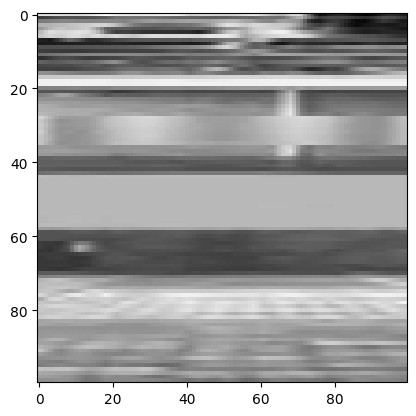

1/1 [==============================] - 0s 36ms/step
Predicted RI Fill Percentage: 0.87% 
 at 107916.300 us
error = -7.839698791503902%


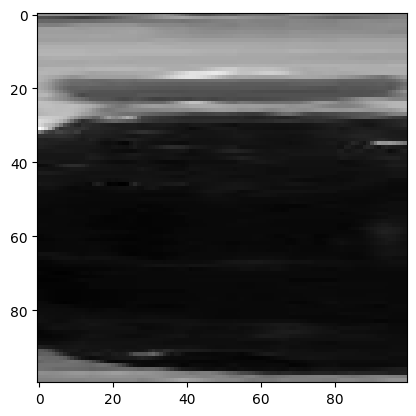

In [4]:
#dataset_strips/strip_bottle_0404.jpeg
#reTest1.jpeg
ran=ra.randint(1, 1000)
img_path = f"cop_img_dataset1/strip_bottle_{1286}.jpeg"
print(f"Image path: {img_path}")

TI=0.7072308408889239
RI=0.95
def preprocess_image(img_path, img_size):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or invalid path: {img_path}")
    img = cv2.resize(img, (img_size[1], img_size[0]))
    img = img / 255.0
    img_array = np.expand_dims(img, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Prediction for TI

img_array = preprocess_image(img_path, (100, 100))
predicted_fill = model.predict(img_array)[0][0]
print(f"Predicted TI Fill Percentage: {predicted_fill:.2f}%")
print(f"error = {( predicted_fill - TI ) *100}%")
plt.imshow(img_array[0, :, :, 0], cmap="gray")  # We remove the batch and channel dimension
plt.show()

# Prediction for RI
img_array = preprocess_image("Retest/95.jpg", (100, 100))# match training input
start = time.perf_counter()
predicted_fill = model.predict(img_array)[0][0]
end = time.perf_counter()
print(f"Predicted RI Fill Percentage: {predicted_fill:.2f}% \n at {(end - start)* 1_000_000:.3f} us")
print(f"error = {(predicted_fill - RI )*100}%")

plt.imshow(img_array[0, :, :, 0], cmap="gray")  # We remove the batch and channel dimension
plt.show()


In [66]:
import time
import numpy as np

# Ensure your image is already preprocessed as a NumPy array
# Example: img_array = np.expand_dims(preprocessed_image, axis=0)

repeats = 10
times = []

# Warm-up run (for GPU or just-in-time compilers)
_ = model.predict(img_array)

for _ in range(repeats):
    start = time.perf_counter()
    predicted_fill = model.predict(img_array, verbose=0)[0][0]
    end = time.perf_counter()
    times.append((end - start) * 1_000_000)  # microseconds

avg_time = np.mean(times)
min_time = np.min(times)
max_time = np.max(times)

print(f"Predicted RI Fill Percentage: {predicted_fill:.2f}%")
print(f"Average Inference Time: {avg_time:.2f} µs")
print(f"Min Time: {min_time:.2f} µs | Max Time: {max_time:.2f} µs")


1/1 [==============================] - 0s 67ms/step
Predicted RI Fill Percentage: 0.95%
Average Inference Time: 113149.94 µs
Min Time: 84554.80 µs | Max Time: 164945.50 µs


1/1 [==============================] - 2s 2s/step


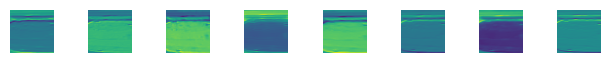

In [51]:



# Choose the layers you want to visualize
layer_outputs = [layer.output for layer in model.layers ]  # Example: only conv layers

# Create a new model that gives outputs sssof those layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Provide an input image
input_image = img_array # shape should match model input
# input_image = np.expand_dims(input_image, axis=0)  # add batch dimension

# Get feature maps
feature_maps = activation_model.predict(input_image)

# Plot the feature maps for the first layer
first_layer_activation = feature_maps[0]  # shape: (1, height, width, channels)

# Visualize the feature maps
n_features = first_layer_activation.shape[-1]
for i in range(n_features):
    plt.subplot(8, 8, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.tight_layout()
plt.show()


Image path: cop_img_dataset1/strip_bottle_1286.jpeg
✅ Image is grayscale and has correct size: (480, 90)


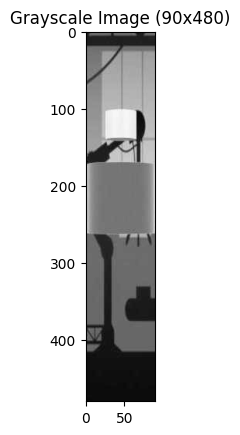

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [ ]:
ran=ra.randint(1, 1000)
img_path = f"cop_img_dataset1/strip_bottle_{1286}.jpeg"
print(f"Image path: {img_path}")

TI=0.7955320070049497
RI=0.973821

def test_image(img_path, expected_size=(90, 480)):
    # Read the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise ValueError(f"Image not found or invalid path: {img_path}")
    
    # Check size
    if img.shape != expected_size:
        raise ValueError(f"Image size {img.shape} does not match expected size {expected_size}.")
    
    print("✅ Image is grayscale and has correct size:", img.shape)
    plt.imshow(img, cmap='gray')
    plt.title("Grayscale Image (90x480)")
    plt.show()

Image path: cop_img_dataset1/strip_bottle_1286.jpeg
✅ Image is grayscale and has correct size: (480, 90)


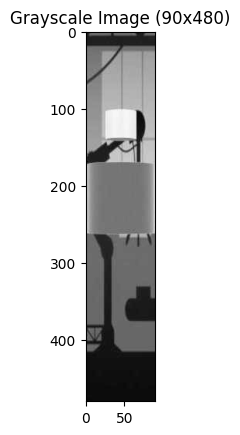

1/1 [==============================] - 0s 39ms/step
Predicted TI Fill Percentage: 0.69%
error = -10.20%
✅ Image is grayscale and has correct size: (480, 90)


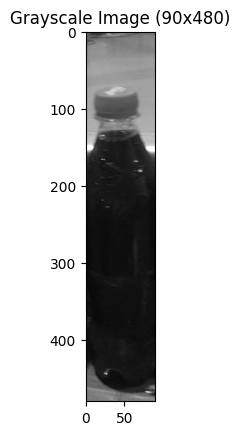

1/1 [==============================] - 0s 42ms/step
Predicted RI Fill Percentage: 0.78%
error = -18.94%


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

TI = 0.7955320070049497
RI = 0.973821

def test_image(img_path, expected_size=(480, 90)):
    # Read the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError(f"Image not found or invalid path: {img_path}")
    
    # Check size
    if img.shape != expected_size:
        raise ValueError(f"Image size {img.shape} does not match expected size {expected_size}.")

    print("✅ Image is grayscale and has correct size:", img.shape)
    
    # Show the image
    plt.imshow(img, cmap='gray')
    plt.title("Grayscale Image (90x480)")
    plt.show()

    # Normalize and reshape for model input
    img = img / 255.0
    img_array = np.expand_dims(img, axis=-1)  # (480, 90, 1)
    img_array = np.expand_dims(img_array, axis=0)  # (1, 480, 90, 1)
    return img_array

# Test image 1 (TI)
img_path = "cop_img_dataset1/strip_bottle_1286.jpeg"
print(f"Image path: {img_path}")
img_array = test_image(img_path, (480, 90))
predicted_fill = model.predict(img_array)[0][0]
print(f"Predicted TI Fill Percentage: {predicted_fill:.2f}%")
print(f"error = {(predicted_fill - TI) * 100:.2f}%")

# Test image 2 (RI)
img_array = test_image("Retest/fuck-gpt.jpeg", (480, 90))
predicted_fill = model.predict(img_array)[0][0]
print(f"Predicted RI Fill Percentage: {predicted_fill:.2f}%")
print(f"error = {(predicted_fill - RI) * 100:.2f}%")
